In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from tqdm.notebook import tqdm
import networkx as nx

  0%|          | 0/25000 [00:00<?, ?it/s]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_4132\1837315122.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', N)


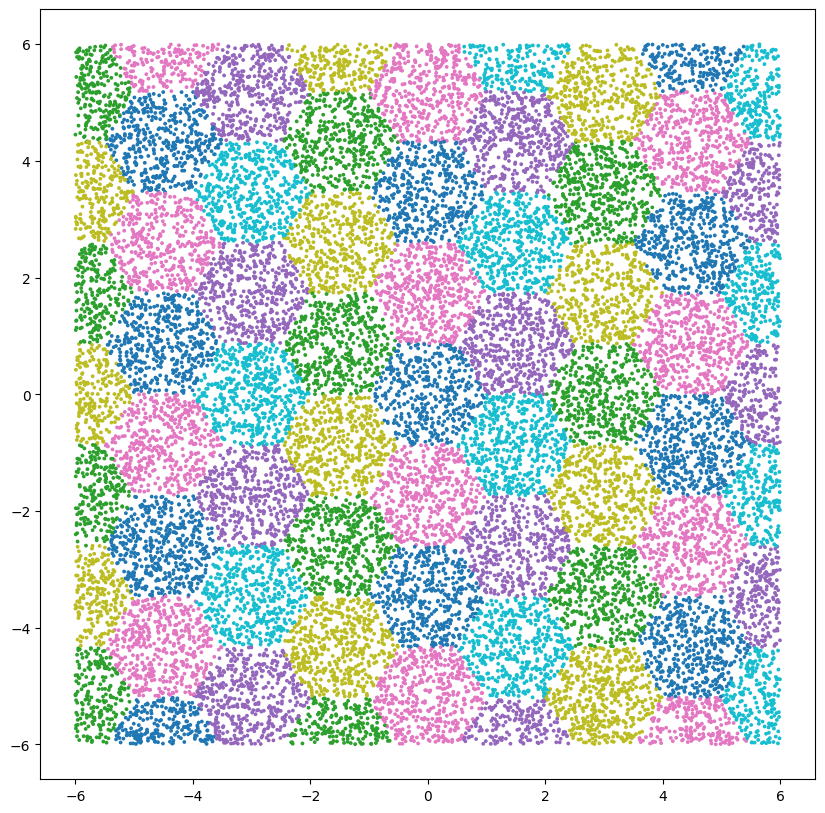

In [48]:
def colorFunction(X, Y, N):
    
    def getMin(x, y):
        min_dist, min_val = float('inf'), (0, 0)
        for m in range(-10, 10):
            for n in range(-10, 10):
                target = (1.5*(m-n), (np.sqrt(3)/2)*(m+n))
                distance = (x-target[0])**2 + (y-target[1])**2
                if distance < min_dist:
                    min_dist = distance
                    min_val = (m, n)
        return min_val

    nums = []
    pb = tqdm(total=len(X))
    for x, y in zip(X, Y):
        m, n = getMin(x, y)
        nums.append((2*m + n)%N)
        pb.update(1)
    return nums


def getHexCenters(N):
    center_x, center_y = [], []
    for m in range(-N, N):
        for n in range(-N, N):
            center_x.append(1.5*(m-n))
            center_y.append((m+n)*(np.sqrt(3)/2))
    return np.array(center_x), np.array(center_y)


N = 6

angleStep = 2*np.pi/20

random2D = np.random.uniform(-3, 3, (100000//4, 2))

scale = 2

X, Y = scale*random2D[:, 0], scale*random2D[:, 1]

colour = colorFunction(X, Y, N)

colors = plt.cm.get_cmap('tab10', N)

custom_cmap = ListedColormap(colors(np.arange(N)))


plt.figure(figsize=(10, 10))

plt.scatter(X, Y, s=3, c=colour, cmap=custom_cmap)

In [49]:
X, Y = [], []

colors_used = 1
while True:
    point1 = np.random.uniform(-5, 5, 2)
    random_angle = np.random.uniform(0, 2*np.pi)
    point2 = point1 + np.array(np.cos(random_angle), np.sin(random_angle))
    X.append(point1[0])

[-1.80082632 -1.88719532]


In [23]:
graph = { 0: [10, 24, 25, 26, 28, 29, 33, 37, 38, 39],
        1: [7, 11, 24, 25, 27, 28, 30, 37, 38, 39],
        2: [10, 12, 23, 26, 27, 29, 34, 37, 38, 39],
        3: [10, 13, 23, 29, 31, 34, 35, 36, 38, 39],
        4: [12, 13, 21, 23, 27, 29, 32, 34, 36, 38, 39],
        5: [11, 13, 20, 21, 23, 27, 35, 36, 38, 39],
        6: [11, 13, 20, 22, 24, 25, 30, 35, 38, 39],
        7: [1, 9, 13, 18, 22, 29, 31, 33, 36],
        8: [11, 12, 19, 27, 28, 29, 32, 37, 39],
        9: [7, 16, 17, 20, 23, 24, 27, 30, 35, 38],
        10: [0, 2, 3, 11, 14, 18, 19, 21, 30, 32],
        11: [1, 5, 6, 8, 10, 15, 16, 17, 26, 31, 34],
        12: [2, 4, 8, 17, 20, 22, 24, 25, 30, 35],
        13: [3, 4, 5, 6, 7, 14, 15, 16, 17, 26, 37],
        14: [10, 13, 22, 24, 25, 29, 31, 33, 35, 38, 39],
        15: [11, 13, 20, 21, 23, 27, 30, 32, 38, 39],
        16: [9, 11, 13, 18, 19, 22, 25, 28, 29, 33, 39],
        17: [9, 11, 12, 13, 18, 19, 21, 29, 32, 36, 39],
        18: [7, 10, 16, 17, 23, 24, 26, 27, 34, 37, 38],
        19: [8, 10, 16, 17, 20, 23, 24, 31, 34, 35, 38],
        20: [5, 6, 9, 12, 15, 19, 26, 28, 29, 33, 37],
        21: [4, 5, 10, 15, 17, 24, 25, 26, 28, 33, 37],
        22: [6, 7, 12, 14, 16, 23, 26, 27, 32, 34, 37],
        23: [2, 3, 4, 5, 9, 15, 18, 19, 22, 25, 28, 33],
        24: [0, 1, 6, 9, 12, 14, 18, 19, 21, 32, 36],
        25: [0, 1, 6, 12, 14, 16, 21, 23, 32, 34, 36],
        26: [0, 2, 11, 13, 18, 20, 21, 22, 30, 35],
        27: [1, 2, 4, 5, 8, 9, 15, 18, 22, 31, 33],
        28: [0, 1, 8, 16, 20, 21, 23, 31, 34, 35, 36],
        29: [0, 2, 3, 4, 7, 8, 14, 16, 17, 20, 30],
        30: [1, 6, 9, 10, 12, 15, 26, 29, 31, 33, 34, 36],
        31: [3, 7, 11, 14, 19, 27, 28, 30, 32, 37],
        32: [4, 8, 10, 15, 17, 22, 24, 25, 31, 33, 35],
        33: [0, 7, 14, 16, 20, 21, 23, 27, 30, 32],
        34: [2, 3, 4, 11, 18, 19, 22, 25, 28, 30],
        35: [3, 5, 6, 9, 12, 14, 19, 26, 28, 32, 37],
        36: [3, 4, 5, 7, 17, 24, 25, 28, 30, 37],
        37: [0, 1, 2, 8, 13, 18, 20, 21, 22, 31, 35, 36],
        38: [0, 1, 2, 3, 4, 5, 6, 9, 14, 15, 18, 19],
        39: [0, 1, 2, 3, 4, 5, 6, 8, 14, 15, 16, 17]
}

nx_graph = nx.Graph(graph)
plt.figure(figsize=(10, 10))
colours = nx.coloring.greedy_color(nx_graph, strategy='largest_first')
# nx.draw(nx_graph, with_labels=True, font_weight='bold', node_color=list(colours.values()))
used_colors = set(colours.values())
used_colors

{0, 1, 2, 3, 4, 5}

<Figure size 1000x1000 with 0 Axes>

In [34]:
import urllib.request
from collections import defaultdict

new_graph = defaultdict(set)
with urllib.request.urlopen('https://www.cs.utexas.edu/~marijn/CNP/803.edge') as f:
    html = f.read().decode('utf-8')
    lines = html.split('\n')[1:-1]
    for line in lines:
        _, a, b = line.split()
        new_graph[int(a)].add(int(b))
        new_graph[int(b)].add(int(a))

nx_graph = nx.Graph(new_graph)
len(nx_graph.nodes), len(nx_graph.edges)
degrees = [len(nx_graph.edges(node)) for node in nx_graph.nodes]
max(degrees), min(degrees)

(30, 4)

In [37]:
colors = nx.coloring.greedy_color(nx_graph, strategy='largest_first')
colors_used = set(colors.values())
colors_used

{0, 1, 2, 3, 4, 5, 6}

In [58]:
V = 4


def print_solution(color):
    print("Solution Exists: Following are the assigned colors")
    print(" ".join(map(str, color)))


def is_safe(v, graph, color, c):
    for i in range(V):
        if graph[v][i] and c == color[i]:
            return False
    return True


def graph_coloring_util(graph, m, color, v):
    if v == V:
        return True
    for c in range(1, m + 1):
        if is_safe(v, graph, color, c):
            color[v] = c
            if graph_coloring_util(graph, m, color, v + 1):
                return True
            color[v] = 0
    return False


def graph_coloring(graph, m):
    color = [0] * V
    if not graph_coloring_util(graph, m, color, 0):
        print("Solution does not exist")
        return False
    print_solution(color)
    return True


graph = nx.adjacency_matrix(nx_graph).todense()
V = len(graph)
m = 5
graph_coloring(graph, m)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "e:\Programming\Github_S\MyLocal\Python\numbers\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Shashank\AppData\Local\Temp\ipykernel_25364\3583919657.py", line 40, in <module>
    graph_coloring(graph, m)
  File "C:\Users\Shashank\AppData\Local\Temp\ipykernel_25364\3583919657.py", line 30, in graph_coloring
    if not graph_coloring_util(graph, m, color, 0):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shashank\AppData\Local\Temp\ipykernel_25364\3583919657.py", line 22, in graph_coloring_util
    if graph_coloring_util(graph, m, color, v + 1):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shashank\AppData\Local\Temp\ipykernel_25364\3583919657.py", line 22, in graph_coloring_util
    if graph_coloring_util(graph, m, color, v + 1):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\S